In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


## Import Dependencies

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

# data visualization for EDA
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import string

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [3]:
df_train = pd.read_csv("../input/titanic/train.csv")
df_test = pd.read_csv("../input/titanic/test.csv")

print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [4]:
# concatenate data of training and test set
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)


df_all = concat_df(df_train, df_test)

In [5]:
# divided data of training and test set
def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis = 1)

## Exploratory Data Analysis

In [6]:
df_all.sample(10)  # generate a sample random row and column

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
740,NaN,D45,S,30.0000,"Hawksford, Mr. Walter James",0,741,1,male,0,1.0,16988
128,NaN,F E69,C,22.3583,"Peter, Miss. Anna",1,129,3,female,1,1.0,2668
563,NaN,NaN,S,8.0500,"Simmons, Mr. John",0,564,3,male,0,0.0,SOTON/OQ 392082
65,NaN,NaN,C,15.2458,"Moubarek, Master. Gerios",1,66,3,male,1,1.0,2661
245,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",0,246,1,male,2,0.0,19928
1181,NaN,NaN,S,39.6000,"Rheims, Mr. George Alexander Lucien",0,1182,1,male,0,NaN,PC 17607
58,5.0,NaN,S,27.7500,"West, Miss. Constance Mirium",2,59,2,female,1,1.0,C.A. 34651
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
169,28.0,NaN,S,56.4958,"Ling, Mr. Lee",0,170,3,male,0,0.0,1601
413,NaN,NaN,S,0.0000,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### How many survived?

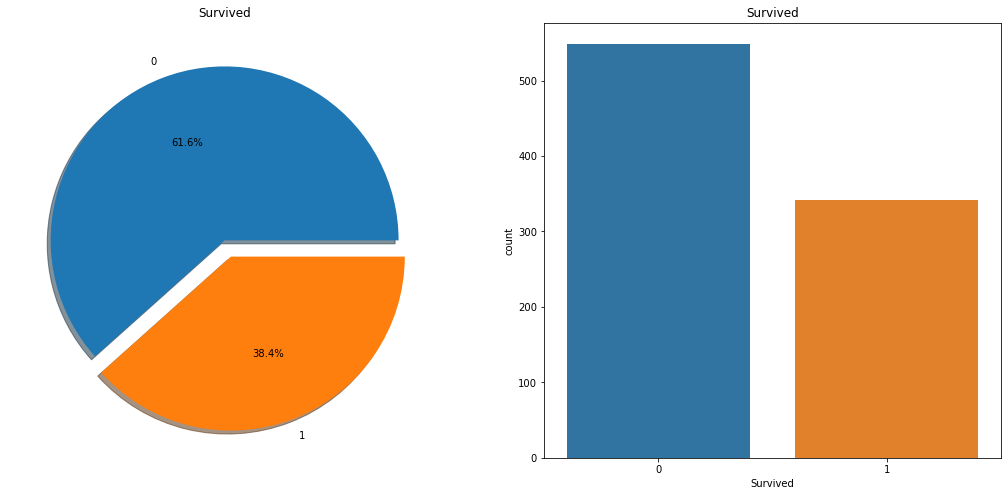

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))  # 1 x 2 subplots

survived = df_train['Survived'].value_counts()
survived.plot.pie(explode=[0, 0.1], 
                  autopct='%1.1f%%', 
                  ax=ax[0], 
                  shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

### Missing Values  
#### 1. Training Set

In [10]:
missing_values_train = df_train.isnull().sum()  # number of missing values

missing_values_train.sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
# finding percentage of missing values

missing_percent = 100 * missing_values_train / len(df_train)
missing_percent_train = (round(missing_percent, 1))  # rounding off

missing_percent_train.sort_values(ascending=False)

Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

In [12]:
# creating dataframe of missing values

df_missing_train = pd.concat([missing_values_train, 
                              missing_percent_train], axis=1, keys=['Total', '%'])
df_missing_train.sort_values(by='%', ascending=False)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


#### 2. Test Set

In [13]:
missing_values_test = df_test.isnull().sum()  # number of missing values

missing_values_test.sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [14]:
# finding percentage of missing values

missing_percent = 100 * missing_values_test / len(df_test)
missing_percent_test = (round(missing_percent, 1))  # rounding off

missing_percent_test.sort_values(ascending=False)

Cabin          78.2
Age            20.6
Fare            0.2
Embarked        0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
PassengerId     0.0
dtype: float64

In [15]:
# creating dataframe of missing values

df_missing_test = pd.concat([missing_values_test, 
                             missing_percent_test], axis=1, keys=['Total', '%'])
df_missing_test.sort_values(by='%', ascending=False)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


So we can see that both training set and test set have missing  values in:  
* Training set : `Age`, `Cabin` & `Embarked` columns  
* Test set : `Age`, `Cabin` & `Fare` columns
    
 It will be convenient to work on concatenated training and test set while dealing with the missing values, otherwise filled data may overfit to training or test set samples.

### Age and Sex

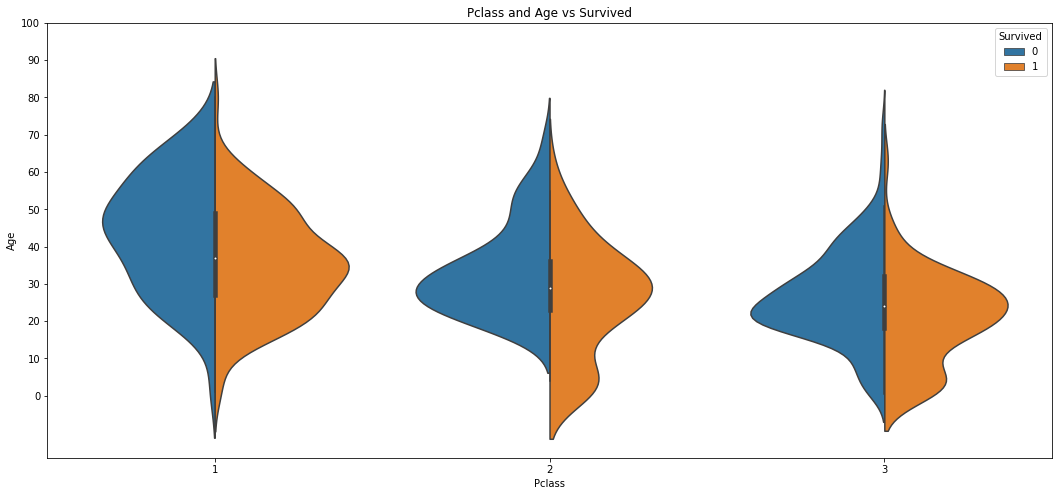

In [16]:
f, ax = plt.subplots(figsize=(18,8))

sns.violinplot("Pclass", "Age", 
               hue="Survived", 
               data=df_train, 
               split=True, 
               ax=ax)

ax.set_title('Pclass and Age vs Survived')
ax.set_yticks(range(0, 110, 10))

plt.show()

We can see that:  
* **Pclass1**: survival chances for Age 20-50 is high  
* **Pclass2**: survival chances for childern is high 
* **Pclass3**: survival chances for Age below 30 is high  
* The survival chances for childern looks good irrespecitve of Pclass

In [17]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

df_all_corr.rename(columns={"level_0": "Feature 1",
                            "level_1": "Feature 2",
                            0: "Correlation Coefficient"},
                            inplace = True)
df_all_corr[df_all_corr['Feature 1'] == 'Pclass']

,Feature 1,Feature 2,Correlation Coefficient
4,Pclass,Pclass,1.000000
8,Pclass,Fare,0.558629
10,Pclass,Age,0.408106
13,Pclass,Survived,0.338481
32,Pclass,SibSp,0.060832
35,Pclass,PassengerId,0.038354
43,Pclass,Parch,0.018322


Here missing values in `Age` are filled with *Median age* of whole data which is not a good idea.   
In order to be more accurate, Sex feature is used as the second level of groupby while filling the missing age values.

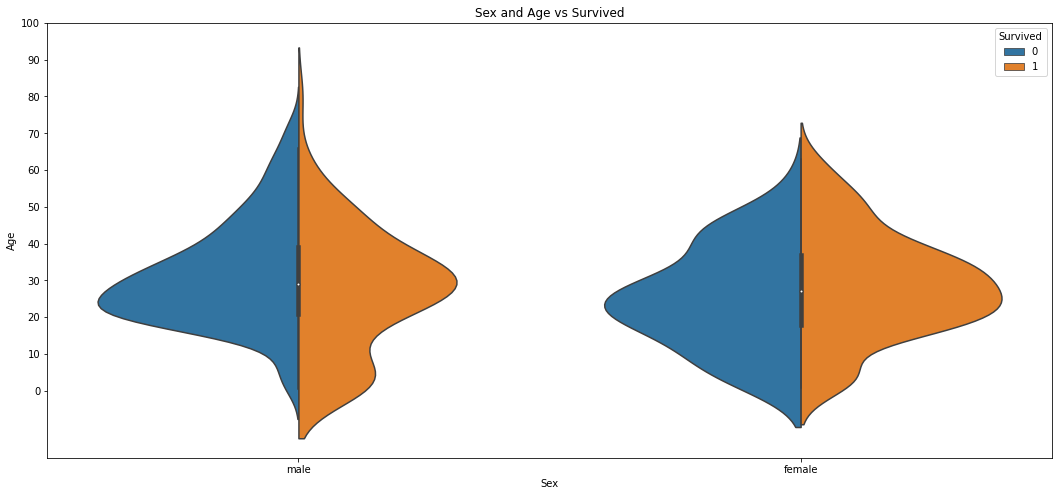

In [18]:
f, ax = plt.subplots(figsize=(18,8))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, split=True, ax=ax)
ax.set_title('Sex and Age vs Survived')
ax.set_yticks(range(0, 110, 10))

plt.show()

**Male**:  
* High chance of survival for age group 18-30 years old.
* High chance of survival for children
* Low chance of survival for age group 5-18 years old.  
  
**Female**:  
* High chance of survival for age group 14-40 years old.
* High chance of survival for childern.

When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median age than males. The median ages below are used for filling the missing values in Age feature.

In [19]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1,4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, 
                sex, age_by_pclass_sex[sex][pclass].astype(int)))
        
df_all['Age'] = df_all.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36
Median age of Pclass 1 males: 42
Median age of Pclass 2 females: 28
Median age of Pclass 2 males: 29
Median age of Pclass 3 females: 22
Median age of Pclass 3 males: 25


### Embarked  
Chance of survival by port of Embarkation

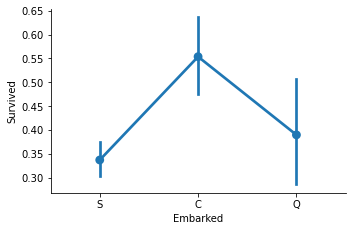

In [20]:
sns.factorplot('Embarked', 'Survived', data=df_train)
fig = plt.gcf()  # used to get current figure
fig.set_size_inches(5,3)
plt.show()

In [21]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


* `Embarked` is the categorial feature and there are only 2 missing values in the whole data set. Both of those passengers are female, upper class and they have the same ticket number . This means that they know each other and embarked from the same port together.  
* The mode `Embarked` value for an upper class female passenger is **C (Cherbourg)**, but this doesn't necessarily mean that they embarked from that port.

In [22]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

* As per google [Titanic Survivor](http://https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html), **Stone, Mrs.George Nelson(Marth Evelyn)** embarked from **S (Southampton)** with her maid **Amelie Icard**. So, we filled the missing values with **S**.

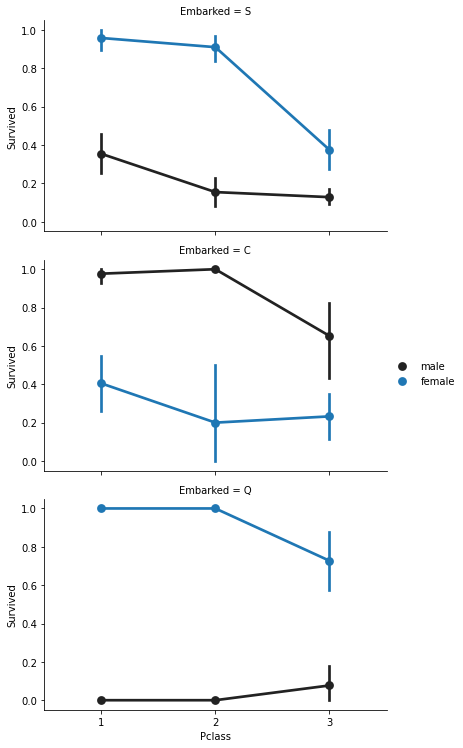

In [23]:
FaceGrid = sns.FacetGrid(df_train, row='Embarked', size=3.5, aspect=1.6)
FaceGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FaceGrid.add_legend()

* `Embarked` seems to be correlated with `survival`, depending on `Sex` and `Pclass`. 
* Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C.
* Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

### Fare

In [24]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


* There is only one missing value of `Fare`.    
* We can assume that is related to family size (`Parch`, `SibSp`) and `Pclass` features.  
* Medain `Fare` value of a male with a third class ticket and no family is logical choice to fill the missing value.

In [25]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0]
med_fare  # median of Fare satisfying condition([3][0][0] -- 3=Pclass, 0=Parch, SibSp)

7.8542

In [26]:
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

### Pclass

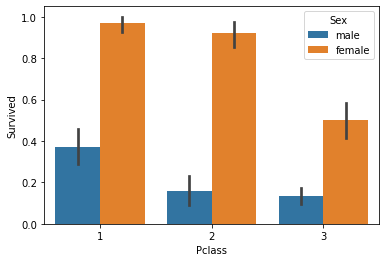

In [27]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

* `Pclass` is contributing to a person's chance of survival, especially if a person is in class 1.  
* From barplot we can say that survival of Women in Pclass 1 is about 95-96% (as only 3 out of 94 women died from this class).  
* Survival rate for Men is very low even from Pclass 1, so it is clear that women were given first priority while rescue. Therefore, `Pclass` is also an important feature.

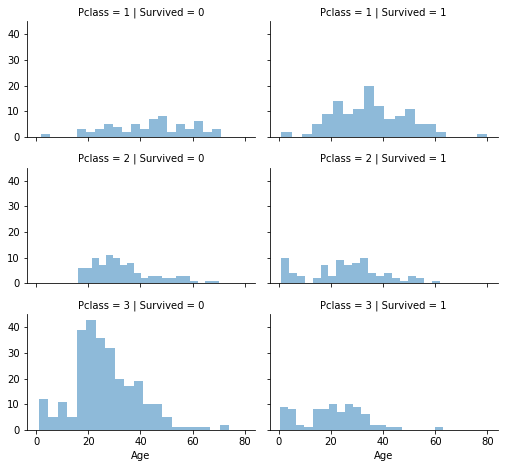

In [28]:
grid = sns.FacetGrid(df_train, col='Survived', 
                    row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

The above plot confirms that probability of survival is:  
* High in  Pclass 1  
* Low in Pclass 3

### SibSp and Parch:  
`SibSp` and `Parch` would make more sense as a combined feature, that shows a person's family size.

In [29]:
data1 = df_train.copy()  # shallow  copy
data1['family_size'] = data1['SibSp'] + data1['Parch'] + 1 # 1 if a person is alone
data1['family_size'].value_counts().sort_values(ascending=False)

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

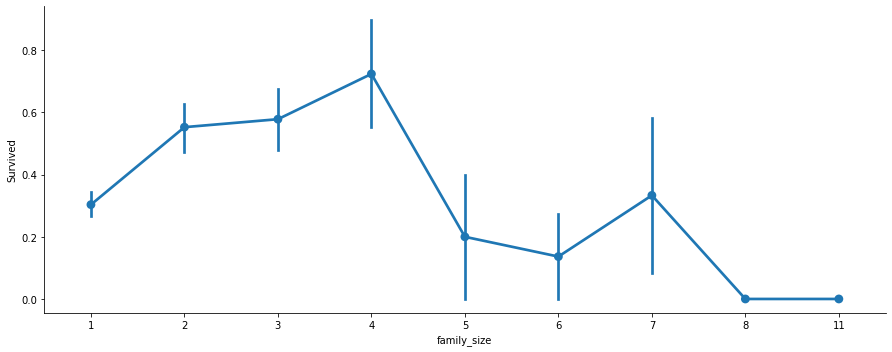

In [30]:
axes = sns.factorplot('family_size', 'Survived', data=data1, aspect=2.5)

* High chance of survival for family size of 2 to 4  
* Lower chance of survival for family size less than 2 or more than 4

### Cabin:  
* The large portion of this feature is missing. We also cannot ignore this feature because some cabins might have higher survival rates.  
* Here, the first letter of the cabin values are the decks in which cabins are located. These decks are mainly seperated for different passanger class.    

Let's create the Deck column by extracting the first letter of Cabin value, and M for the missing value. Also we will drop various columns, group 'Deck' with 'Pclass' and rename 'Name' to 'Count'.

In [31]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 
                                                                        'SibSp', 'Parch', 'Fare', 'Embarked', 
                                                                        'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'})
# doing transpose for accessibility
df_all_decks = df_all_decks.transpose()

df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

We can see that:
* **A, B** and **C** decks were only for 1st class passengers
* **D** and **E** decks were for all classes
* **F** and **G** were for both 2nd and 3rd class passengers

Now, we will get  the percentage count of passangers of different classes in every decks

In [32]:
def get_pclass_dist(df):
    
    # create a dictionary of every deck for 'passenger count' in every class
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 
                   'F': {}, 'G': {}, 'M': {}, 'T': {}}
    
    # extract deck column from df_all_decks
    decks = df.columns.levels[0]
    
    # create a new dataframe with '0' if empty in respective 'Pclass' of df_all_decks
    for deck in decks:
        for pclass in range(1,4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0
    
    df_decks = pd.DataFrame(deck_counts)
    
    
    
    # create a dictionary of every deck for 'percentage count' of passangers in every class 
    deck_percentages = {}
    
    for col in df_decks.columns:
        deck_percentages[col] = [(count/df_decks[col].sum()) * 100 
                                 for count in df_decks[col]]
    
    return deck_counts, df_decks, deck_percentages



all_deck_count, df_decks_return, all_deck_percent = get_pclass_dist(df_all_decks)

In [33]:
print(df_decks_return)  # returns a dataframe of passenger count
all_deck_count  # returns a dictionary of passenger count in every class

    A   B   C   D   E   F  G    M  T
1  22  65  94  40  34   0  0   67  1
2   0   0   0   6   4  13  0  254  0
3   0   0   0   0   3   8  5  693  0


{'A': {1: 22, 2: 0, 3: 0},
 'B': {1: 65, 2: 0, 3: 0},
 'C': {1: 94, 2: 0, 3: 0},
 'D': {1: 40, 2: 6, 3: 0},
 'E': {1: 34, 2: 4, 3: 3},
 'F': {1: 0, 2: 13, 3: 8},
 'G': {1: 0, 2: 0, 3: 5},
 'M': {1: 67, 2: 254, 3: 693},
 'T': {1: 1, 2: 0, 3: 0}}

In [34]:
all_deck_percent # returns a percentage count of passengers

{'A': [100.0, 0.0, 0.0],
 'B': [100.0, 0.0, 0.0],
 'C': [100.0, 0.0, 0.0],
 'D': [86.95652173913044, 13.043478260869565, 0.0],
 'E': [82.92682926829268, 9.75609756097561, 7.317073170731707],
 'F': [0.0, 61.904761904761905, 38.095238095238095],
 'G': [0.0, 0.0, 100.0],
 'M': [6.607495069033531, 25.04930966469428, 68.34319526627219],
 'T': [100.0, 0.0, 0.0]}

Now let's visualize a graph showing a percentage distrubution of passengers of different classes in every Deck.

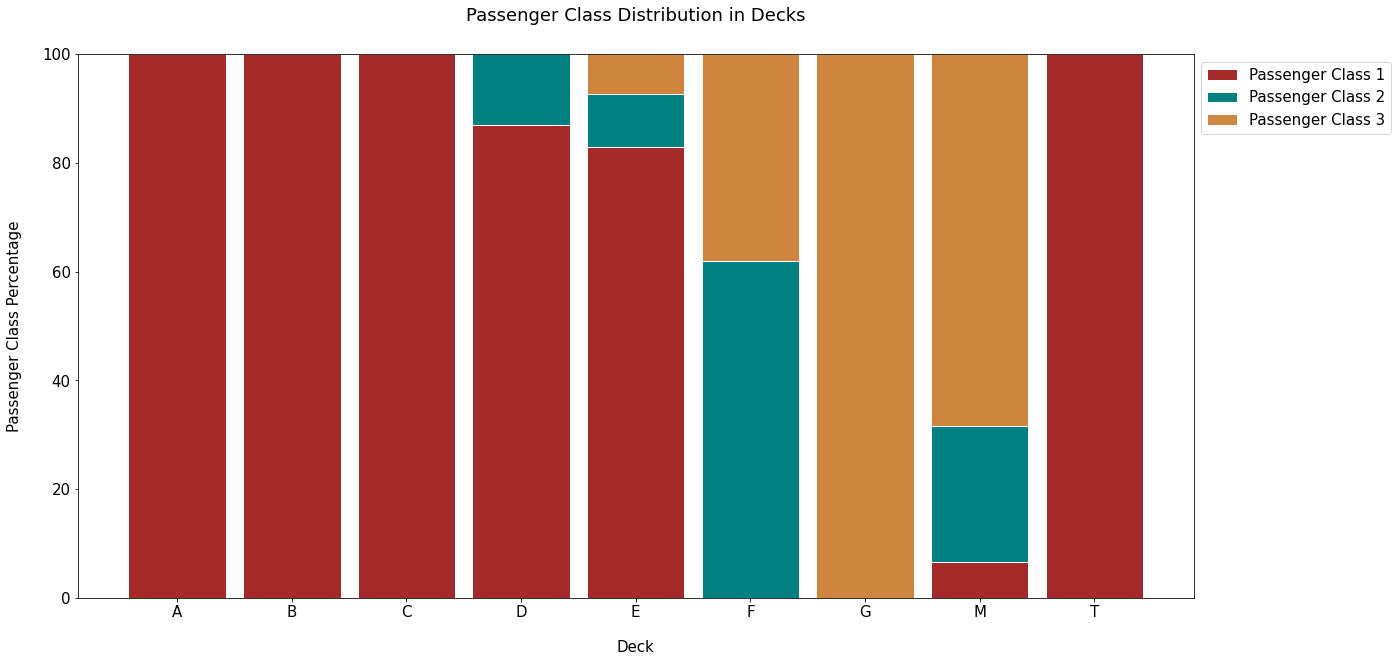

In [35]:
def display_pclass_dist(percentages):
    
    # converting dictionary into dataframe and then transpose
    df_percentages = pd.DataFrame(percentages).transpose()
    
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20,10))
    
    plt.bar(bar_count, pclass1, color='brown',
            edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='teal', 
            edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1+pclass2, color='peru', 
            edgecolor='white', width=bar_width, label='Passenger Class 3')
    
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    
    plt.xticks(bar_count, deck_names)
    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='best', bbox_to_anchor=(1,1), prop={'size':15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)
    
    plt.show()
    
display_pclass_dist(all_deck_percent)

So we can see that:  
* **Deck A**:
    * 1st Class: 100%
* **Deck B**:
    * 1st Class: 100%
* **Deck C**:
    * 1st Class: 100%
* **Deck D**:
    * 1st Class: 87%
    * 2nd Class: 13%
* **Deck E**:
    * 1st Class: 83%
    * 2nd Class: 10%
    * 3rd Class: 7%
* **Deck F**:
    * 2nd Class: 62%
    * 3rd Class: 38%
* **Deck G**:
    * 3rd Class: 100%  


There is only one passenger in Deck T and he is a 1st Class passanger. So let's group him with Deck A passenger.

In [36]:
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'    

Now we will visualize the survival rates in different decks. We will follow the same method as above to group 'Deck' with 'Survived' and then We'll define a function (just like we did earlier to visualize percentage of passengers in every deck.)

In [37]:
df_all_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 
                                                                             'Fare', 'Embarked', 'Pclass', 
                                                                             'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

In [38]:
def get_survived_dist(df):
    
    # create a dictionary for 'survival count' in every deck
    survival_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 
                       'E':{}, 'F':{}, 'G':{}, 'M':{}}
    
    # extract deck column from df_all_decks
    decks = df.columns.levels[0]
    
    
    for deck in decks:
        for survive in range(0,2):
            survival_counts[deck][survive] = df[deck][survive][0]
            
    df_survival = pd.DataFrame(survival_counts)
    
    # create a dictionary of 'survival count' in every class
    survival_percentages = {}
    
    for col in df_survival.columns:
        survival_percentages[col] = [(count/df_survival[col].sum()) * 100 
                                     for count in df_survival[col]]
    
    return survival_counts, survival_percentages

all_survival_count, all_survival_percentage = get_survived_dist(df_all_survived)

In [39]:
all_survival_count

{'A': {0: 9, 1: 7},
 'B': {0: 12, 1: 35},
 'C': {0: 24, 1: 35},
 'D': {0: 8, 1: 25},
 'E': {0: 8, 1: 24},
 'F': {0: 5, 1: 8},
 'G': {0: 2, 1: 2},
 'M': {0: 481, 1: 206}}

In [40]:
all_survival_percentage

{'A': [56.25, 43.75],
 'B': [25.53191489361702, 74.46808510638297],
 'C': [40.67796610169492, 59.32203389830508],
 'D': [24.242424242424242, 75.75757575757575],
 'E': [25.0, 75.0],
 'F': [38.46153846153847, 61.53846153846154],
 'G': [50.0, 50.0],
 'M': [70.01455604075691, 29.985443959243085]}

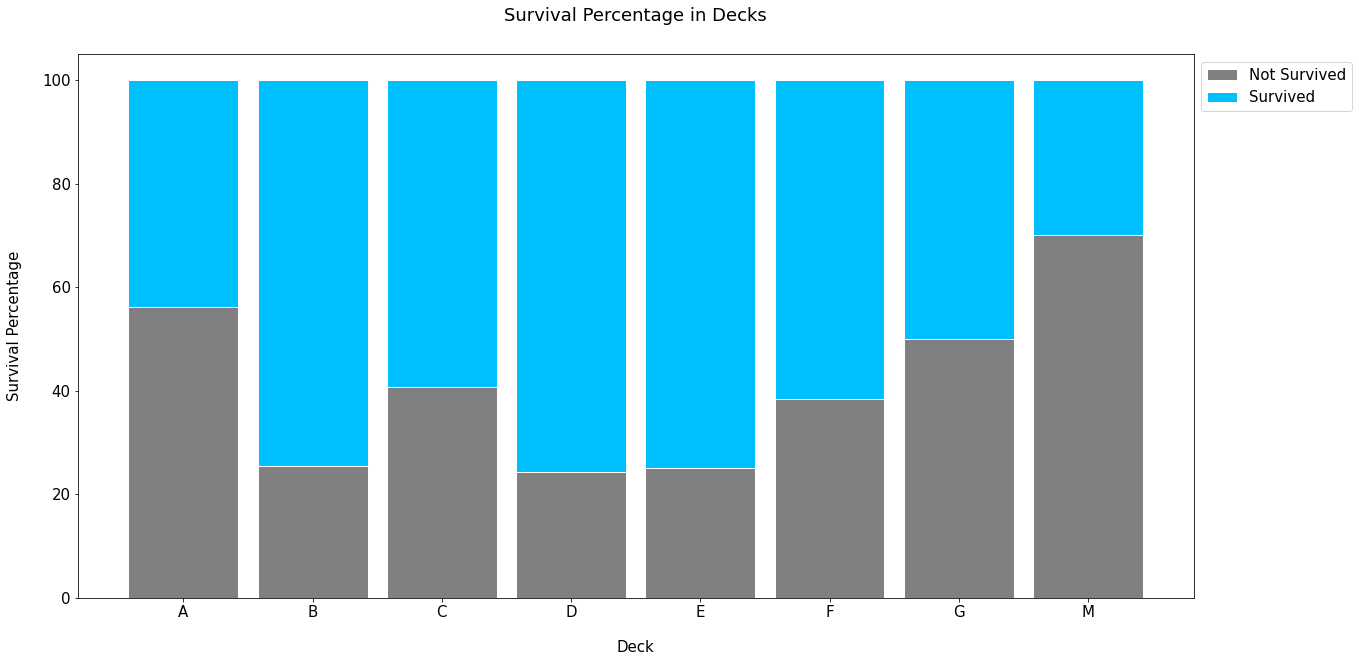

In [41]:
def display_survival_dist(percentages):
    
    df_survival_percentages = pd.DataFrame(percentages).transpose()
    
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85
    
    not_survived = df_survival_percentages[0]
    survived = df_survival_percentages[1]
    
    plt.figure(figsize=(20,10))
    plt.bar(bar_count, not_survived, color='grey', 
            edgecolor='white', width=bar_width, label='Not Survived')
    plt.bar(bar_count, survived, color='deepskyblue', bottom=not_survived, 
            edgecolor='white', width=bar_width, label="Survived")
    
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), prop={'size':15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()
    
display_survival_dist(all_survival_percentage)

* Deck **B, C, D** and **E** has highest survival rates, which are mostly occupies by *1st* class passengers.  
* **M** has lowest survival rate, which is mostly occupied by *2nd and 3rd* class passengers.   

Cabin **M** has lowest survival rates as it itself represents the cabin of missing values (which is the data of victims that they couldn't retrive simply because they didn't survive). Also it is a unique group with shared characteristics.  


Now, we will group some of the values with eachother based on their similarity.  
So, we will label the deck:  
* **A, B,** & **C** as **ABC** as all have 1st class passengers.
* **D** & **E** as **DE** and **F** & **G** as **FG** because both have similar passenger class distribution and same survival rates.
* **M** will remain alone as it is very different from others.

In [42]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

We have filled up all the missing values of different features.   
We will also drop the `Cabin` feature as we are using `Deck` feature instead.

In [43]:
df_all.drop(['Cabin'], inplace=True, axis=1)

df_all.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


In [44]:
df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    print(df.isnull().sum())
    print("\n")

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64


Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Ticket         0
Deck           0
dtype: int64




### Continuous Features

Let's see the distribution of continuous features `Age` and `Fare` with *Survived / Not Survived* on Training and Test sets.


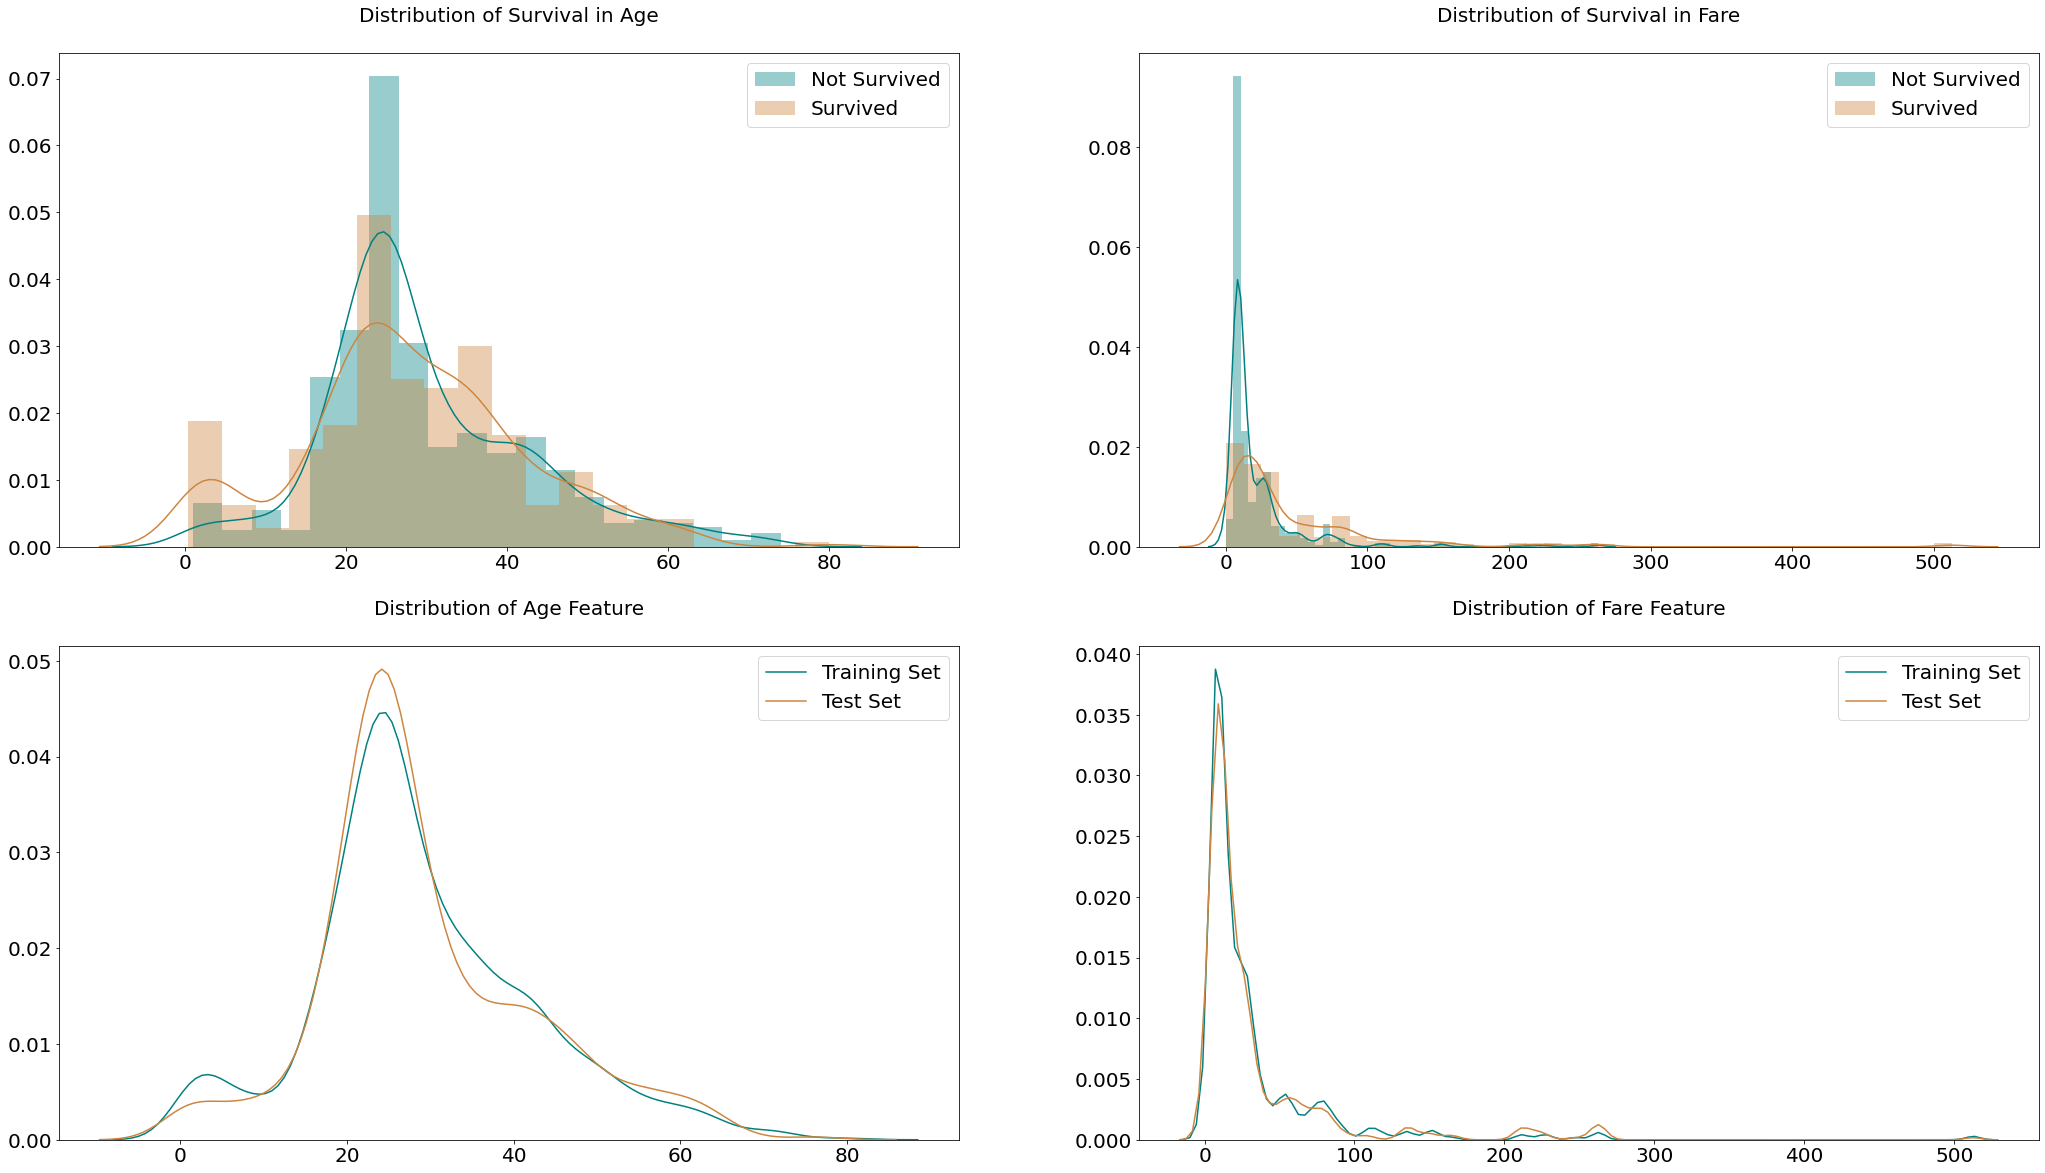

In [45]:
continuous_features = ['Age', 'Fare']
survived = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(continuous_features):
    
    # distribution of survival in feature
    sns.distplot(df_train[~survived][feature], label = 'Not Survived', 
                 hist=True, color='teal', ax=axs[0][i]) 
                        # [~survived] means 'Not Survived'
    sns.distplot(df_train[survived][feature], label='Survived', 
                 hist=True, color='peru', ax=axs[0][i])
    
    # distribution of feature in dataset
    sns.distplot(df_train[feature], label='Training Set', 
                 hist=False, color='teal', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', 
                 hist=False, color='peru', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    # providing the ticks for x and y in respective plots
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
    
plt.show()

We can see that the distribution has more spikes and bumps on training set, but is smoother on test set, which means the model might not be able to generalize well on test set.
* The distribution of `Age` feature shows that children younger than 15 has higher survival rate than any of other age groups.
* The distribution of `Fare` feature shows the survival rates is higher on distribution tails.

###  Categorical Features:
Let's see the distribution of categorical features `Embarked`, `Parch`, `Pclass`, `Sex`, `SibSp`, and `Deck` with *Survived / Not Survived* on Training and Test sets.


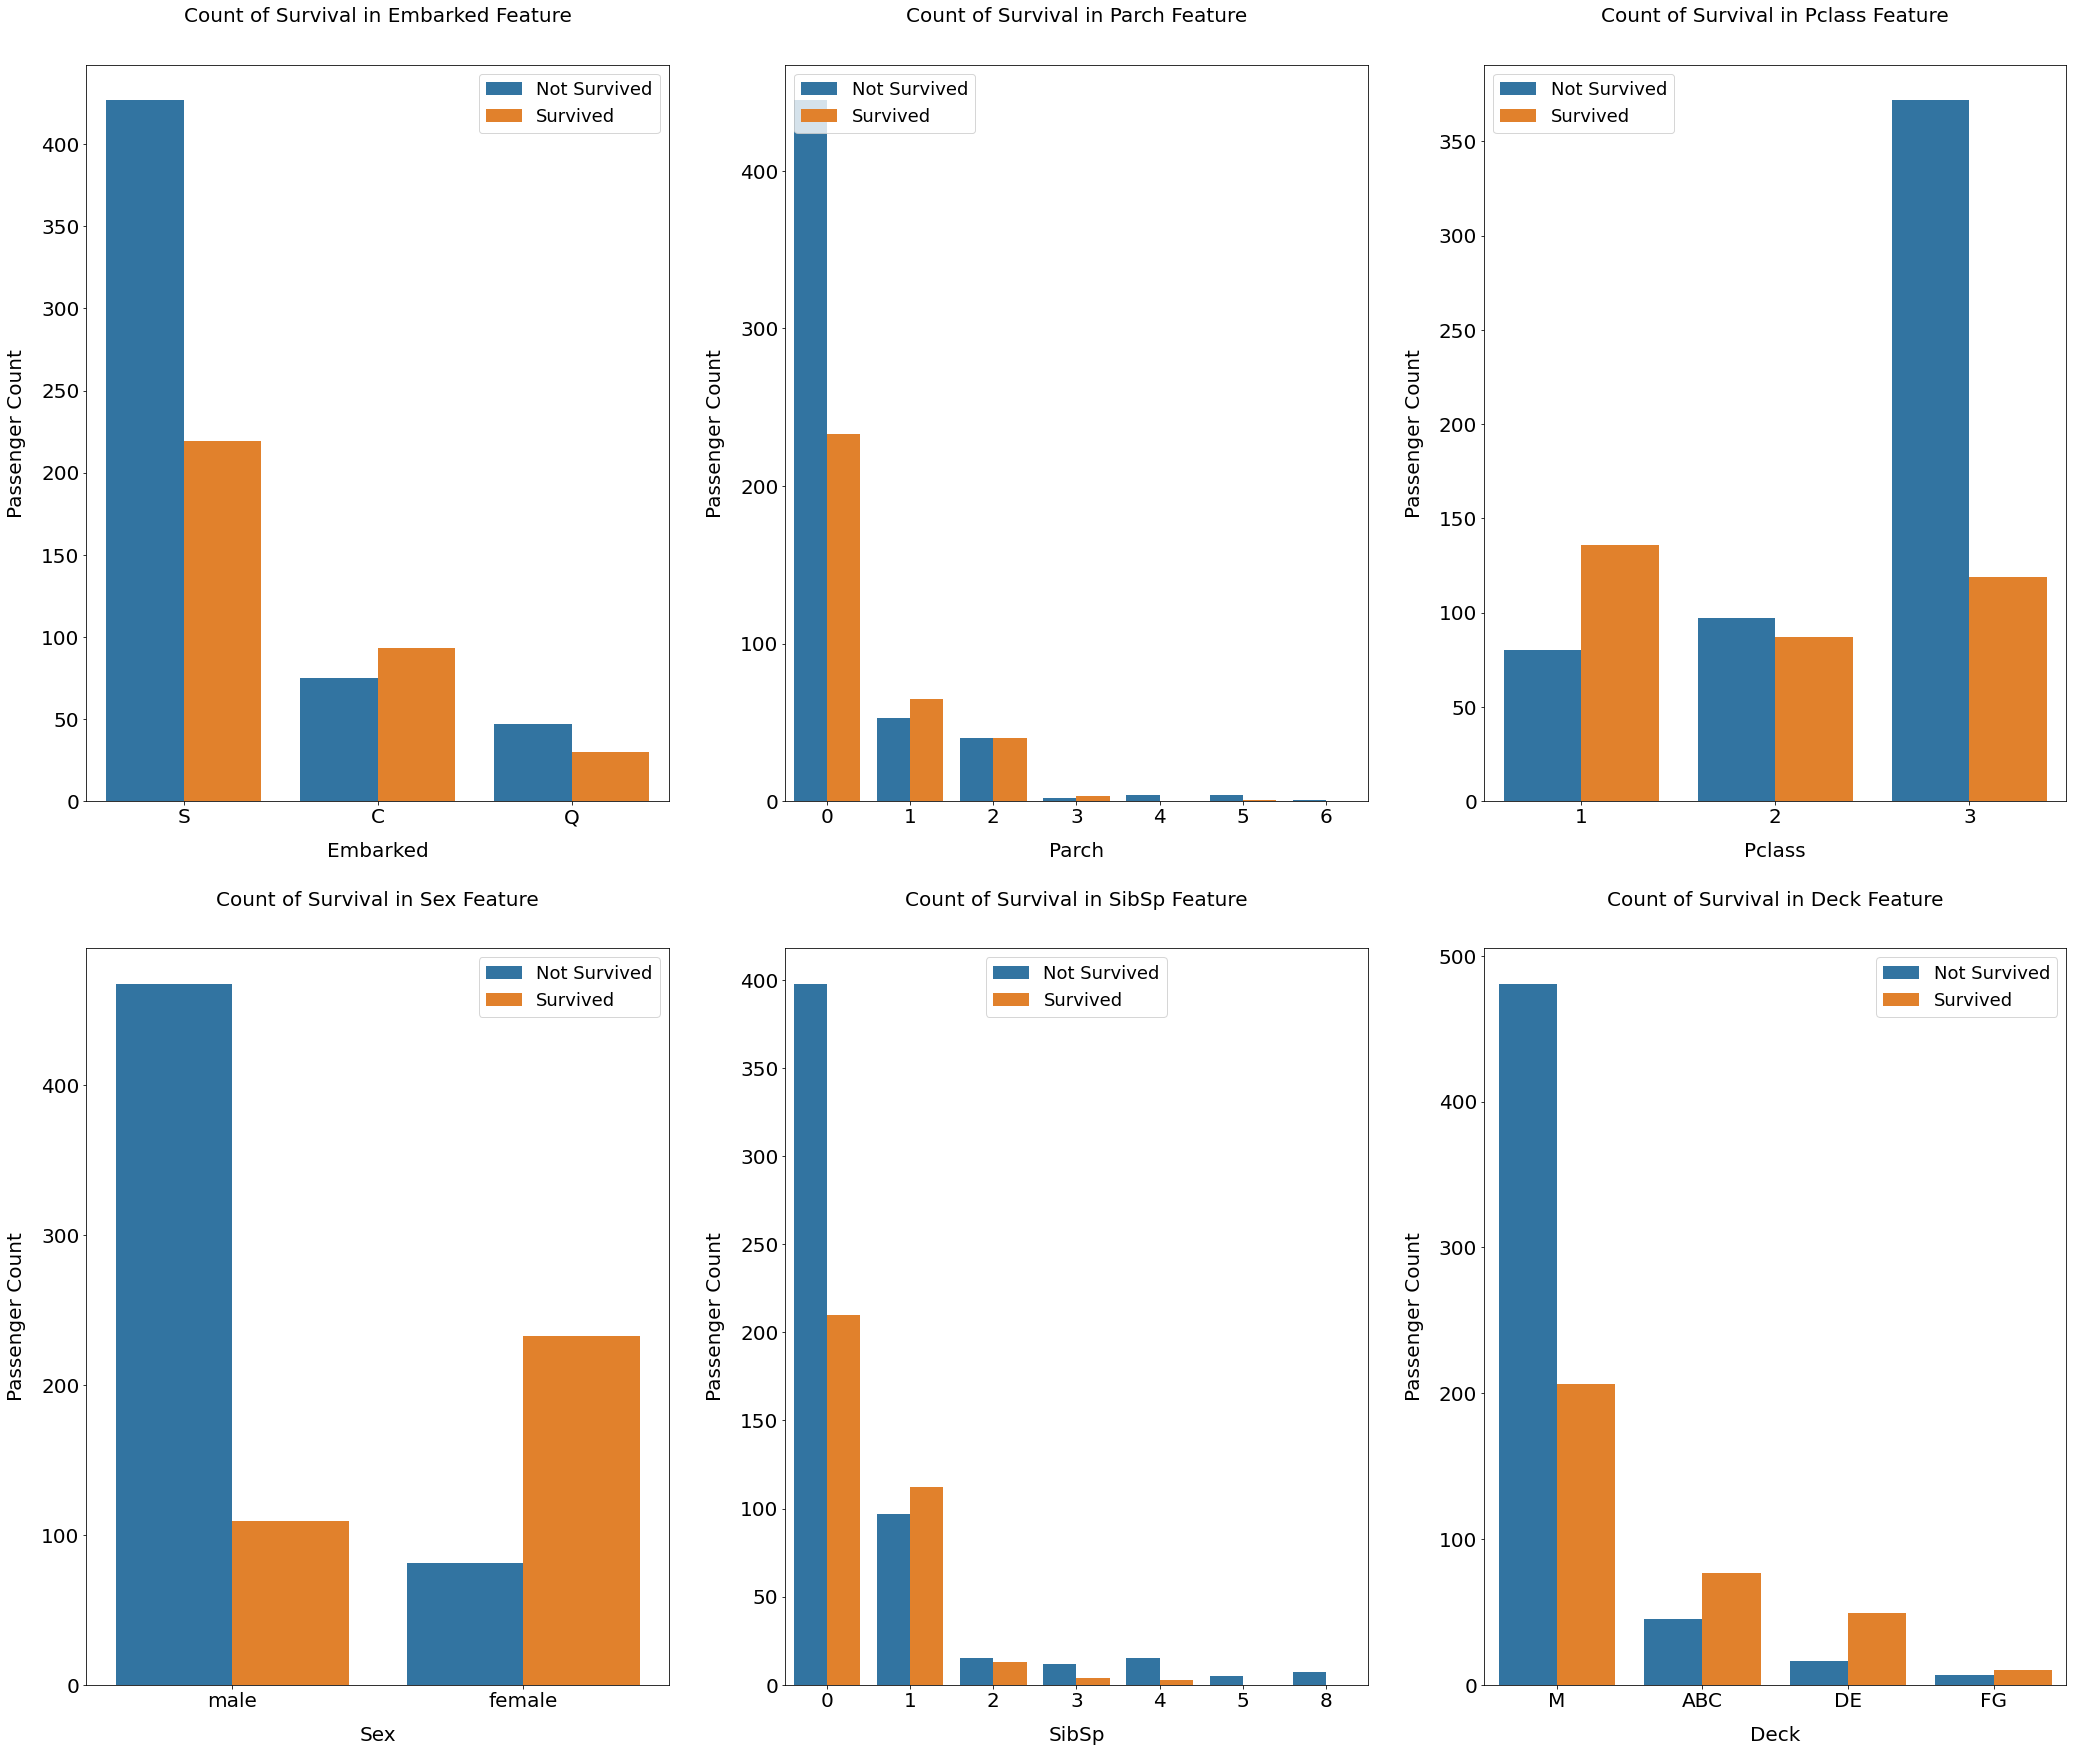

In [46]:
categorical_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper centre', prop={'size':18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Here we can see that every categorical features are very helpful in predicting survivor/victim and every feature has at least one class with high rate of 'Not Survived'.   
But the best features are `Pclass` and `Sex` as they have the most homogeneous distributions.

### Correlation between the features:

* **POSITIVE CORRELATION** : If an **increase in feature A** leads to **increase in feature B**, then they are positively correlated. A value 1 means ***Perfect Positive Correlation***.

* **NEGATIVE CORRELATION**: If an **increase in feature A** leads to **decrease in feature B**, then they are negatively correlated. A value -1 means ***Perfect Negative Correlation***.

* If two features are highly or perfectly correlated (i.e., increase in one leads to increase in other) that means they hold highly similar information and there is little or no variance in the information. This is known as **MultiColinearity**. 
* So, while making or training models, we should *try to eliminate redundant features* as it will reduce the training time.

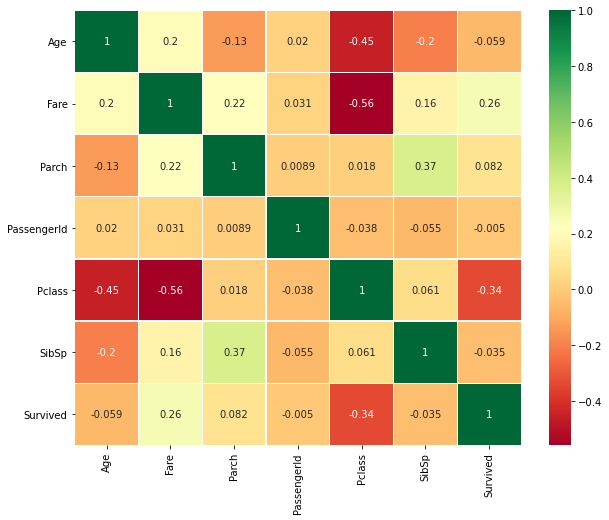

In [47]:
sns.heatmap(df_all.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

fig = plt.gcf()
fig.set_size_inches(10,8)

plt.show()

Only numeric features are compared as it is obvious that we can not correlate alphabets and numbers.  
* We can see that the features are not much correlated. In fact the highest correlation is between `SibSp` and `Parch` and it is **0.37**. So we carried on with all the features.

## Feature Engineering

### Fare

In [48]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

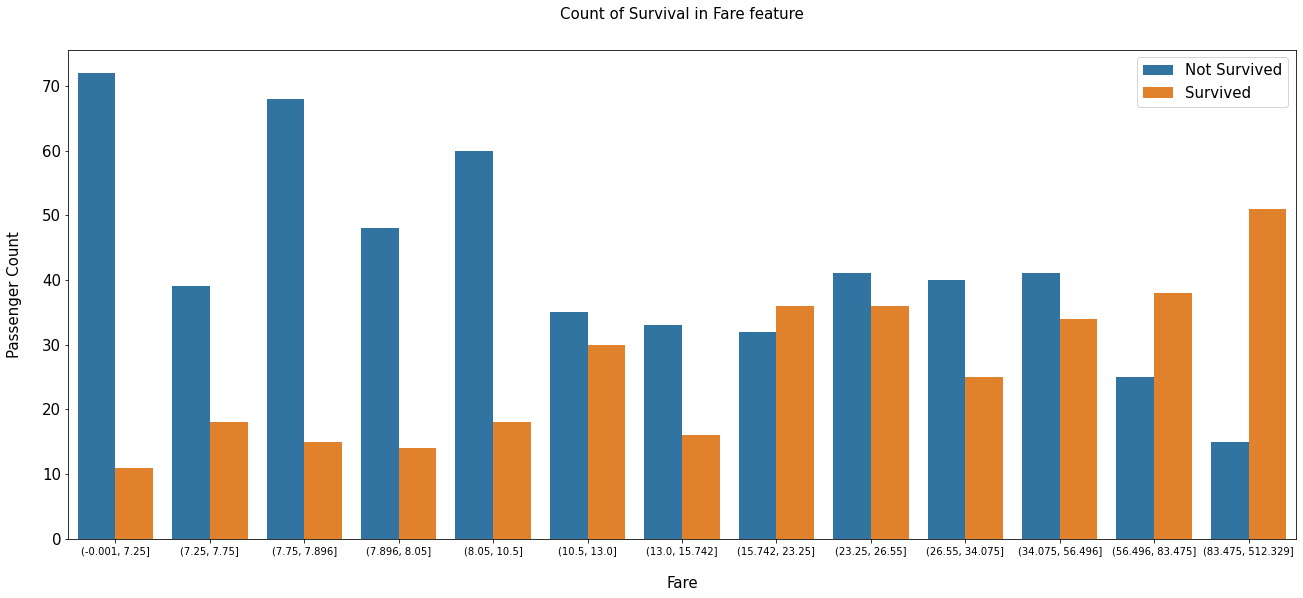

In [49]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} feature'.format('Fare'), size=15, y=1.05)

plt.show()

* `Fare` feature is *positively skewed* and survival rate is extremely high on the right end.
* **13** quantile based bins are used for it. Even though the bins are too much, they provide decent amount of information gain.   
* The groups at the left side of the graph has lowest survival rates and the groups as the right has highest survival rates.
* This survival rate was not visible in the distribution graph. There is also an unusual group **(15.742, 23.25]** in the middle with high survival rate that is captured in this process.

  
 ### Age:

In [50]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

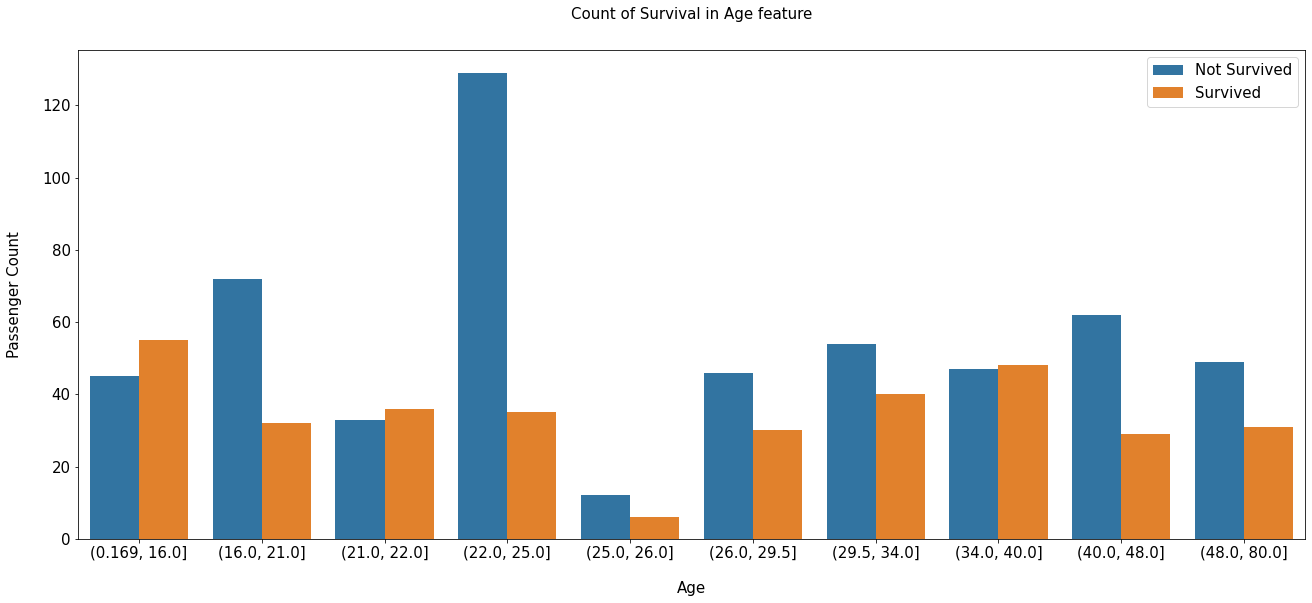

In [51]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} feature'.format('Age'), size=15, y=1.05)

plt.show()

* `Age` feature has a normal distribution with some spikes and bumps and **10** quantile based bins are used for it.
* The 1st bin has the highest survival rate and the 4th bin has the lowest survival rate.
* There is also an unusual group **(34.0, 40.0]** with high survival rate that is captured in this process.

### Frequency Encoding

`Family Size` is created by adding `SibSp`, `Parch` and **1** (ie., 'Siblings and Spouse, Parents and Children). These columns are added in order to find the total size of families. And adding 1 at the end is the current passenger.
* Family Size with **1** are labeled as **Alone**
* Family Size with **2**, **3** and **4** are labeled as **Small**
* Family Size with **5** and **6** are labeled as **Medium**
* Family Size with **7**, **8** and **11** are labeled as **Large**

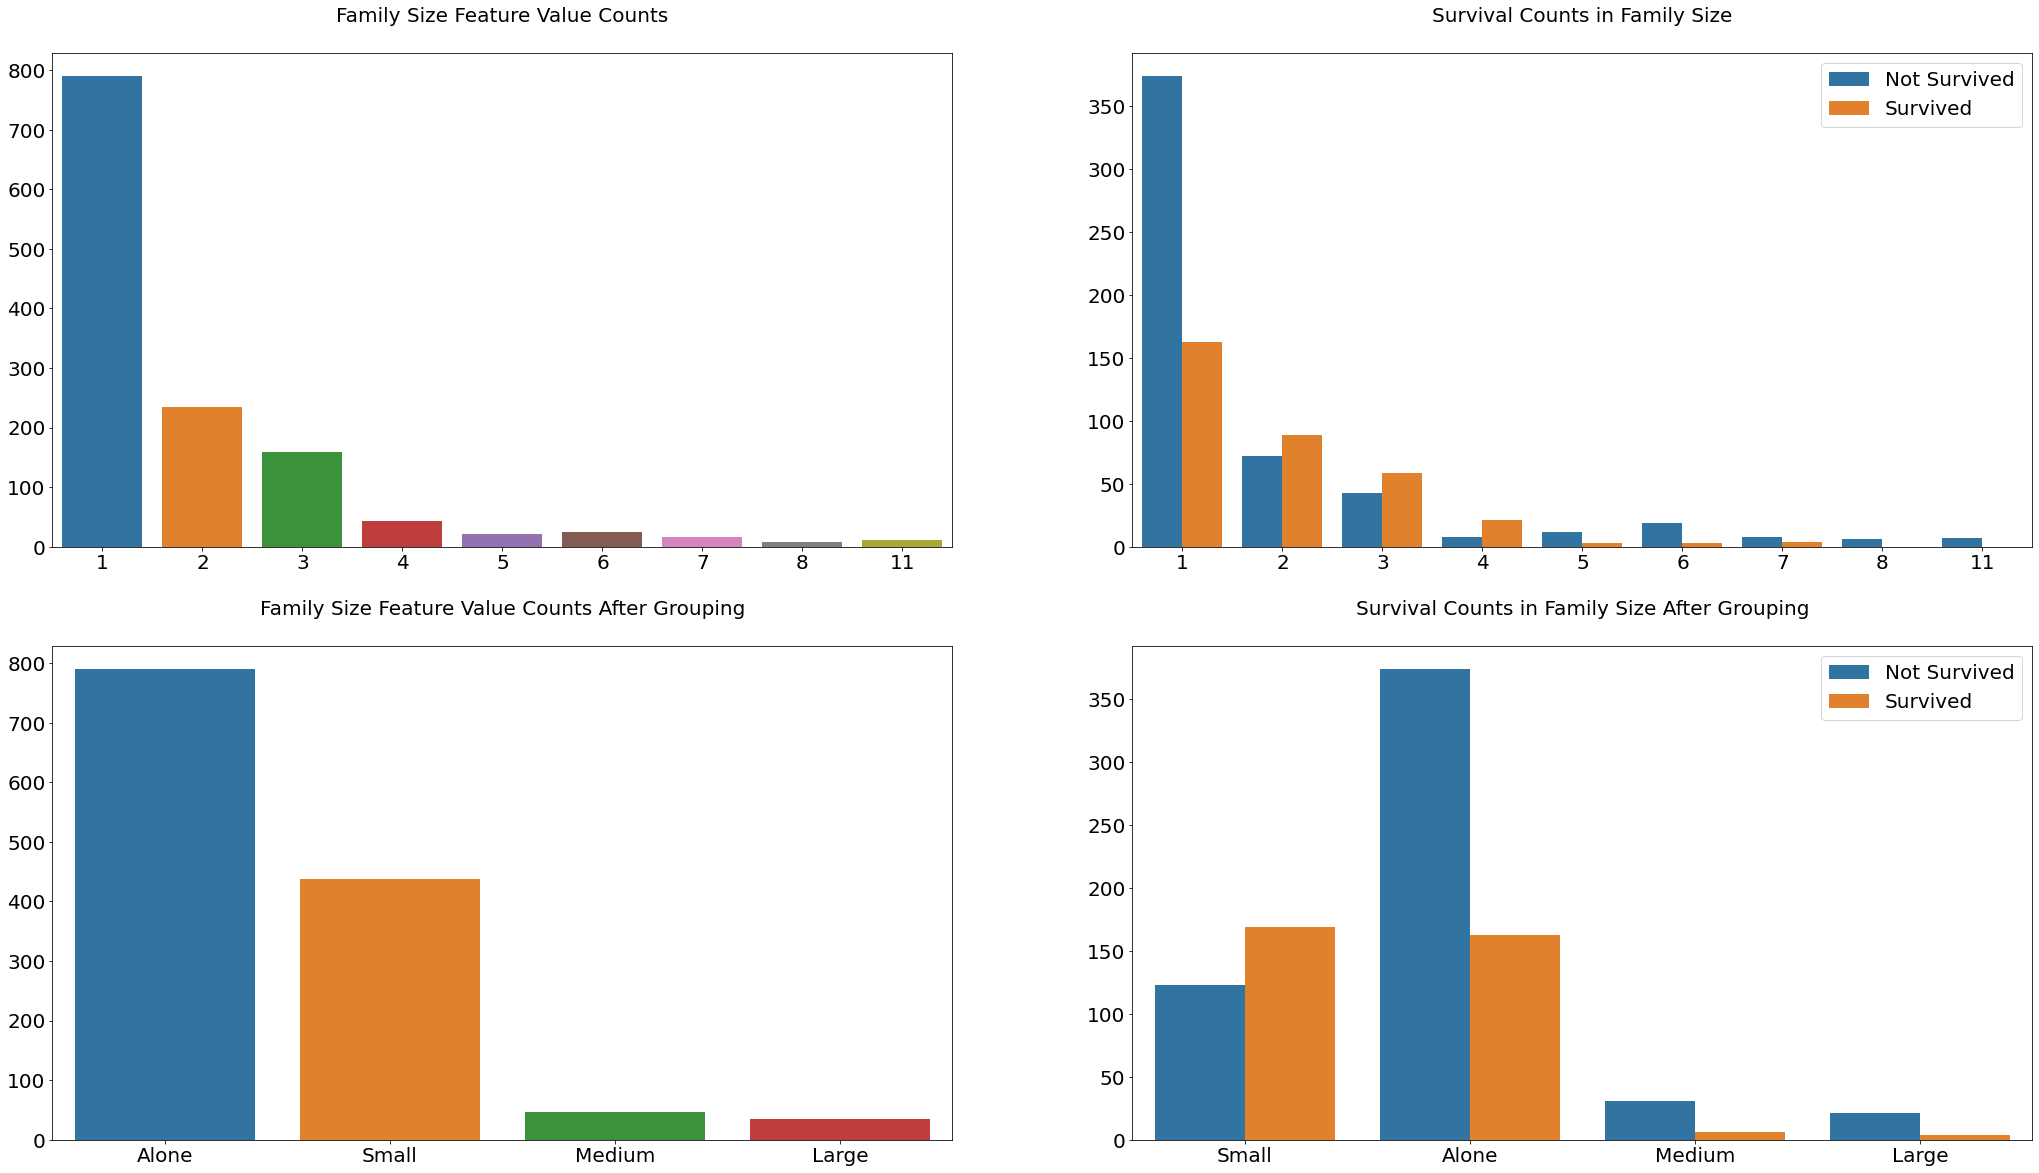

In [52]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20,20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, 
            y=df_all['Family_Size'].value_counts().values, 
            ax=axs[0][0])

sns.countplot(x='Family_Size', hue='Survived', 
              data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size', size=20, y=1.05)


# mapping family size
family_map = {1:'Alone', 
              2:'Small', 3:'Small', 4:'Small', 
              5:'Medium', 6:'Medium', 
              7:'Large', 8:'Large', 11:'Large'}

df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, 
            y=df_all['Family_Size_Grouped'].value_counts().values, 
            ax=axs[1][0])

sns.countplot(x='Family_Size_Grouped', hue='Survived', 
              data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
        
plt.show()

Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.  
  
### Ticket:
There are too many unique `Ticket` values to analyze, so grouping them up by their frequencies makes things easier. 
  
**This feature differ from `Family_Size` as** many passengers travelled along with groups which consists of friends, maids, nannies etc. who used same tickets but weren't counted as family.  
  
Also we can not group `Ticket` feature by their prefixes because if it had any meaning in it, it would have already captured by `Pclass` and `Embarked` features.

In [53]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

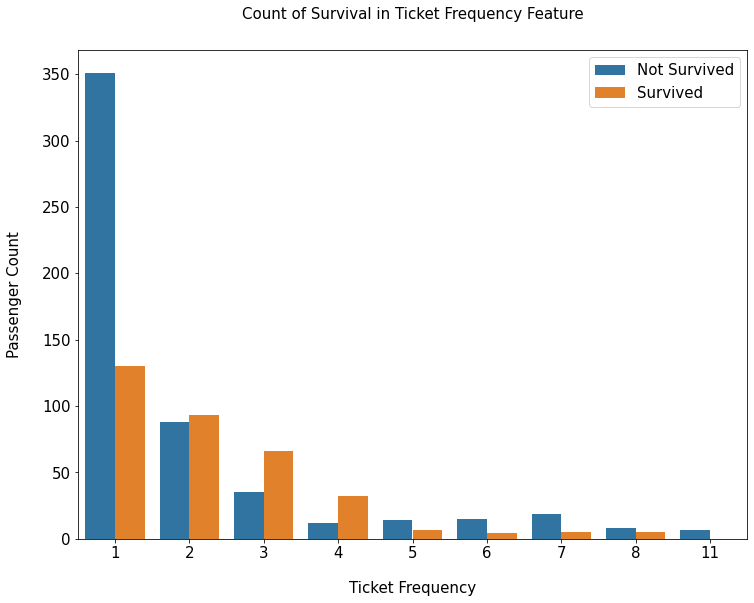

In [54]:
fig, axs = plt.subplots(figsize=(12,9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size = 15, labelpad=20)
plt.ylabel('Passenger Count', size = 15, labelpad=20)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

According to the graph, 
* Groups with **2, 3** and **4** members had a higher survival rate. 
* Passengers who travelled alone has the lowest survival rate. 
* After **4** group members, survival rate decreases drastically.  
  
### Title and IsMarried:
Title is created by extracting the prefix before `Name` feature. 
In our dataset, there are too many title which doesn't seem correct and needs to be replaced.  
  
We will replace titles like:
* **Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona** by **Miss/Mrs/Ms**
* **Dr, Col, Major, Jonheer, Capt, Sir, Don, Rev** by **Dr/Military/Nobel/Clergy**
* **Master** is unique title given to male passengers below 26.

Here **Mlle, Mme, Dona, Jonkheer, Din and Rev** are name of the passesngers which are *miss-classified* as `Name` feature is split by comma



In [55]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

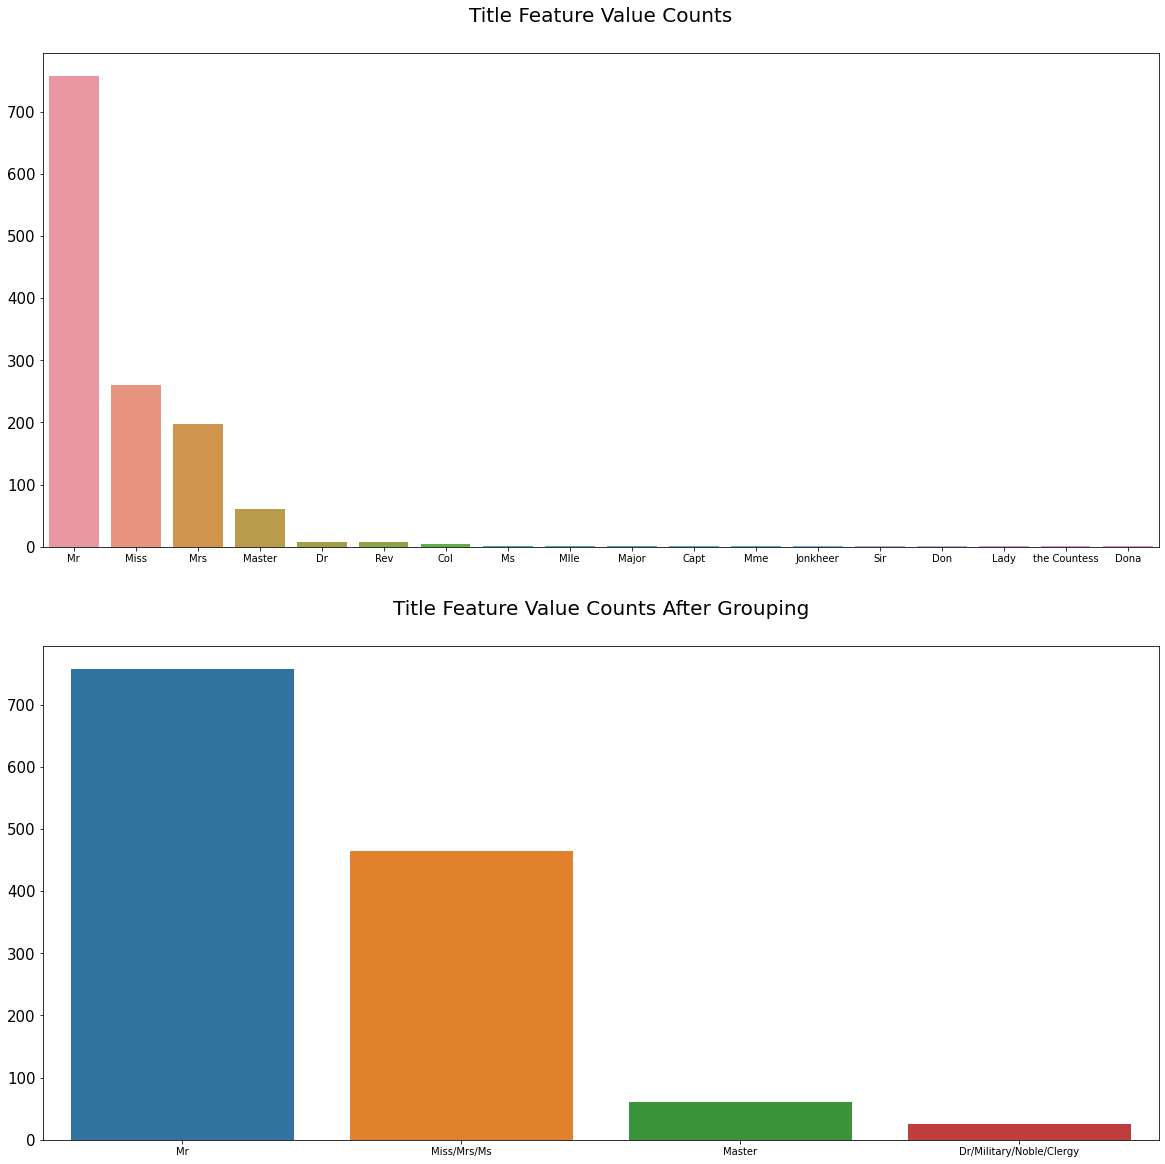

In [56]:
fig, axs = plt.subplots(nrows=2, figsize=(20,20))
sns.barplot(x=df_all['Title'].value_counts().index, 
            y=df_all['Title'].value_counts().values, 
            ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=15)

for i in range(2):
    axs[i].tick_params(axis='y', labelsize=15)
    
axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs', 'Ms', 
                                           'Mlle', 'Lady', 'Mme', 
                                           'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 
                                           'Jonkheer', 'Capt', 'Sir', 
                                           'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, 
            y=df_all['Title'].value_counts().values, 
            ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [57]:
df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

### Target Encoding:
`extract_surname` function is used for extracting surnames of passangers from the `Name` feature. Family feature is created with the extracted surname. This is necessary for grouping passengers in the same family.

In [58]:
def extract_surname(data):
    
    families = []
    
    for i in range(len(data)):
        name = data.iloc[i]
        
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, ' ').strip()
            
        families.append(family)
        
    return families

In [59]:
df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

* `Family_Survival_Rate` is calculated from families on training set as there is no `Survived` feature in test set. 
* A list of family names that are occuring in both training and test set (`non_unique_families`) is created. 
* The survival rate is calculated for families with more than 1 member in that list, and stored in `Family_Survival_Rate` feature.  
  
  
* An extra binary feature `Family_Survival_Rate_NA` is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrive their survival rate.  
* `Ticket_Survival_Rate` and `Ticket_Survival_Rate_NA` features are also created with the same method. 
* `Ticket_Survival_Rate` & `Family_Survival_Rate` are averaged and named `Survival_Rate`, and `Ticket_Survival_Rate_NA` & `Family_Survival_Rate_NA` are also averaged and become `Survival_Rate_NA`.

In [60]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family', 'Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket', 'Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

# Checking a family exist in both training and test set and has members more than 1
for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i,1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i,0]
        
# Checking a ticket exists in both training and test set and has members more than 1
for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i,1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i,0]

In [61]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []

test_family_survival_rate = []
test_family_survival_rate_NA = []


for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)     

for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        

df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA

df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA  

In [62]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []

test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []


for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)     

for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        

df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA

df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA  

In [63]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2

## Feature Transformation

### Convert Formats:
* We will convert categoricaldata to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.
* In this step, we will also define our x(independent/features/exploratory/predictory etc) and y(dependent/target/outcome/response etc) variables for data modeling.  
  
### Label Encoding Non-Numerical Features:
* `Embarked`, `Sex`, `Deck` `Title` and `Family_Size_Grouped` are object type, and `Age` and `Fare` features are category type. These are converted into numerical type with `LabelEncoder`. 
* `LabelEncoder` basically labels the classes from **0** to **n**.
This process is necessary for models to learn from those features.


In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [65]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

### One-Hot Encoding the Categorical Features:
* The categorical features (`Pclass`, `Sex`, `Deck`, `Embarked`, `Title`) are converted to one-hot encoded features with `OneHotEncoder`.
* `Age` and `Fare` features are not converted because they are ordinal.

In [66]:
onehot_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in onehot_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1,1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1,n+1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

In [67]:
# *encoded_features will give all encoded features of each of the Six onehot_features

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

### Conclusion:
* `Age` and `Fare` features are binned. Binning helps dealing wtih outliers and reveals some homogeneous groups in those features.   
* `Family_Size` is created by adding `Parch` and `SibSp` features and **1**.  
* `Ticket_Frequency` is created by counting the occurance of `Ticket` values.  
* `Name` feature is very useful.
    * `Title` and `IsMarried` features are created from the title prefix in the names. 
* `Family_Survival_Rate` and `Family_Survival_Rate_NA` features are created by target encoding the surname of the passengers.
* `Ticket_Survival_Rate` and `Ticket_Survival_Rate_NA` features are created by averaging the `Ticket` feature.
* `Survival_Rate` feature is created by averaging the `Family_Survival_Rate` and `Ticket_Survival_Rate` features.
* Finally, the non-numeric type of features are label encoded and categorical features are one-hot encoded and created **5** new features (`Family_Size`, `Title`, `IsMarried`, `Survival_Rate` and `Survival_Rate_NA`) are dropped after encoding. 

In [68]:
df_all = concat_df(df_train, df_test)

# Dropping unwanted features
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 
             'Survived', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 
             'Ticket', 'Title', 'Ticket_Survival_Rate', 'Family_Survival_Rate', 
             'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)
df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


## Building Machine Learning Models
We will train several machine learning models.  
Also the dataset does not provide the labels for test set, we will use the predictions on training set to compare the algorithms with each other.


In [69]:
# model helpers
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [70]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values

print('X_train shape: {}'.format(X_train.shape))
print('Y_train shape: {}'.format(y_train.shape))


X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 26)
Y_train shape: (891,)
X_test shape: (418, 26)


In [71]:
# Stochastic Gradient Descent (SGD)
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_score = ('{:.2f}'.format(sgd.score(X_train, y_train)*100))


# Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_score = ('{:.2f}'.format(random_forest.score(X_train, y_train)*100))


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_score = ('{:.2f}'.format(logreg.score(X_train, y_train)*100))


# K Nearest Neighbor
knn= KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = ('{:.2f}'.format(knn.score(X_train, y_train)*100))


# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian_score = ('{:.2f}'.format(gaussian.score(X_train, y_train)*100))


# Perceptron
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_score = ('{:.2f}'.format(perceptron.score(X_train, y_train)*100))


# Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_score = ('{:.2f}'.format(linear_svc.score(X_train, y_train)*100))


# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_score = ('{:.2f}'.format(dt.score(X_train, y_train)*100))

Now, we will see the performances of different models. For that we will create a dataframe and arrange the models in order with performances from highest to lowest.

In [72]:
results = pd.DataFrame({'Model': ['Stochastic Gradient Descent', 'Random Forest', 
                                  'Logistic Regression', 'K Nearest Neighbor', 'Naive Bayes', 
                                  'Perceptron', 'Support Vector Machine', 'Decision Tree'], 
                        'Score': [sgd_score, random_forest_score, logreg_score, knn_score, 
                                  gaussian_score, perceptron_score, linear_svc_score, dt_score]})

df_results = results.sort_values(by='Score', ascending=False)
df_results = df_results.set_index('Score')
df_results

,Model
Score,
95.29,Random Forest
95.29,Decision Tree
89.11,K Nearest Neighbor
86.20,Logistic Regression
85.63,Support Vector Machine
83.16,Perceptron
81.82,Naive Bayes
74.30,Stochastic Gradient Descent


We can see that the Random Forest Classifier gives highest performance.  
Now, let's check how it performs when we use Cross Validation.

## K-Fold Cross Validation
K-Fold Cross Validation randomly splits the training data into **K subsets** called **Folds**.    
We will splits our data into 10 folds (K=10).  
Our random forest model will be trained and evaluated 10 times, using different folds for evaluation everytime giving an output array with 10 different scores.

In [73]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.81111111 0.84269663 0.74157303 0.86516854 0.86516854 0.85393258
 0.85393258 0.76404494 0.86516854 0.86516854]
Mean: 0.832796504369538
Standard Deviation: 0.043245843460572114


From this we can say that,  
* Our model has an average accuracy of **84%** with a standard deviation of **4%**.
* The Standard Deviation show us how precise the model estimates are. In our case the accuracy of our model can differ **+/- 4%**

In [74]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_train, y_train)

rf_score = ('{:.2f} %'.format(rf.score(X_train, y_train)*100))
rf_score

'95.29 %'

The accuracy is really good but still we will try of increase it's performance even further in following section.

## Feature Importance
Feature Importance is used to measure the relative importance of each feature using `rf.feature_importances_` function.

In [75]:
X = df_train.drop(columns=drop_cols)

importances = pd.DataFrame({'feature': X.columns, 
                            'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')


importances.head(26)

,importance
feature,
Age,0.145
Survival_Rate,0.117
Fare,0.109
Sex_1,0.084
Title_4,0.081
Title_3,0.079
Sex_2,0.066
Ticket_Frequency,0.056
Pclass_3,0.044


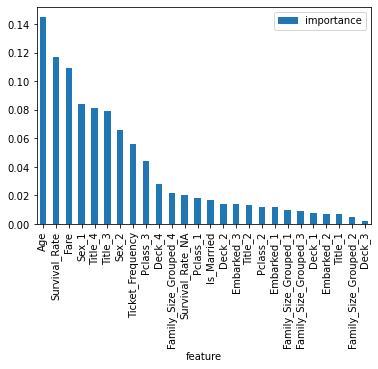

In [76]:
importances.plot.bar()

### Training Random Forest again:

In [77]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest_score = ('{:.2f} %'.format(random_forest.score(X_train, y_train)*100))
random_forest_score

'95.29 %'

Generally, *the more features you have, the more likely your model will suffer from overfitting and vice versa.* Our Random Forest model predicts as good as it did before.  
There is also an another approach called **out-of-bag** samples to estimate the generalization accuracy. This approach's estimate is as accurate as using a test set of the same size as training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [78]:
print(" random forest oob score:", round(random_forest.oob_score_, 4)*100, "%")

 random forest oob score: 82.27 %


In [79]:
print("rf oob score:", round(rf.oob_score_, 4)*100, "%")

rf oob score: 83.73 %


## Hyperparameter Tuning
The script for Hyperparameter tuning is written below.  
Note: It is intensionally changed into Markdown as it takes very long time to run.

from sklearn.model_selection import GridSearchCV

param_grid = {'criterion ': ['gini', 'entropy'], 
              'min_samples_leaf' : [1, 5, 10,], 
              'min_samples_split' : [2, 4, 10,], 
              'n_estimators': [100,500,11000,1500]}

gd = GridSearchCV(estimator = RandomForestClassifier(random_state=42), 
                  param_grid = param_grid,
                  verbose = True)

gd.fit(X_train,y_train)

print(gd.bestscore) 
print(gd.bestestimator)

### Testing new Parameters

In [80]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)
random_forest.fit(X_train, y_train)
y_pred = (random_forest.predict(X_test)).astype(int)

random_forest.score(X_train, y_train)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s


oob score: 84.74000000000001 %


Now as we have a proper model, we can start evaluating it's performance in a more better way. Previously we only used accuracy and the oob score which is just another form of accuracy.  
The thing is it is more complicated to evaluate a cassification model than a regression model.

## Model Evaluation

In [81]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks     

In [82]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86666667 0.91011236 0.7752809  0.87640449 0.86516854 0.80898876
 0.83146067 0.78651685 0.88764045 0.87640449]
Mean: 0.8484644194756555
Standard Deviation: 0.04306699214476702


In [83]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(random_forest, X_train, y_train, cv=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks     

### Confusion Matrix:

In [84]:
from sklearn.metrics import confusion_matrix
print('Confusion_Matrix:\n {}'.format(confusion_matrix(y_train, pred)))

Confusion_Matrix:
 [[500  49]
 [ 88 254]]


We interpret Confusion Matrix as:  
( [ True Negatives - 500, False Positives - 49 ],  
[ False Negatives - 88, True Positives - 254 ] )   

In other words, 
* TN - 500 passengers were correctly classified as not survived
* FP - 49 passengers were wrongly classified as not survived
* FN - 88 passengers were wrongly classified as survived
* TP - 254 passengers were correctly classified as survived  

### Precision and Recall:

In [85]:
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_train, pred))
print('Recall:', recall_score(y_train, pred))

Precision: 0.8382838283828383
Recall: 0.7426900584795322


* Our model predicts a passenger's survival **84%** of the time correctly = **Precision**.
* It predicted the survival of 74% of the people who actually survived = **Recall**.

### F-Score:

In [86]:
from sklearn.metrics import f1_score
print('F1 Score:', f1_score(y_train, pred))

F1 Score: 0.7875968992248062


### ROC AUC Curve:

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished


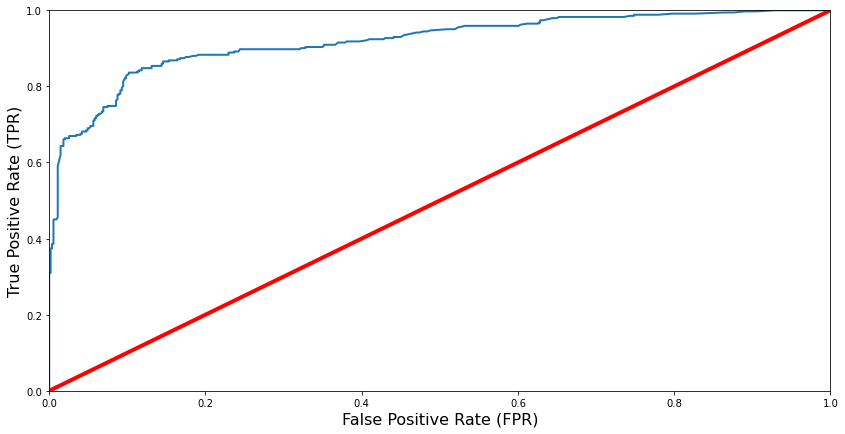

In [87]:
from sklearn.metrics import roc_curve

# Getting probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

# Computing true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    
plt.figure(figsize=(14,7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

Our random forest model seems to do a good job. Of course we also have a tradeoff, because classifier produces more false positives, the higher the true positive rate is.

### ROC AUC Score:
The ROC AUC Score is corresponding score to the ROC AUC Curve. It is simpply computed by measuring the area under the curve, which is called AUC.  
A classifier that is 100% correct would have a ROC AUC Score of 1 and a completely random classifier would have a score of 0.5.

In [88]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(y_train, y_scores) 
print('ROC-AUC-Score:', r_a_score)

ROC-AUC-Score: 0.9184189222296787


In [89]:
submission  = pd.DataFrame({'PassengerId': df_test['PassengerId'], 
                            'Survived': y_pred})

submission.to_csv('submission.csv', index=False)

In [93]:
kaggle competitions submit -c titanic -f submission.csv -m "submission at 22.02 "

SyntaxError: invalid syntax (<ipython-input-93-08e362d062bc>, line 1)